In [5]:
import sys
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
data = pd.read_csv('adult_data.csv')
data.to_csv("mydata.csv", index=False, header=False)
df = data.apply(lambda x:pd.Series(x))

NameError: name 'labels' is not defined

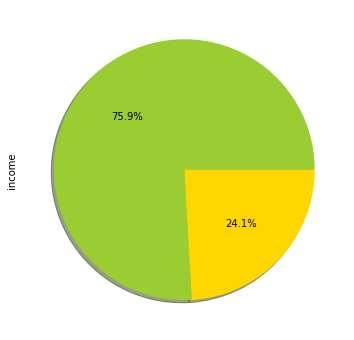

In [7]:
colors = ['yellowgreen', 'gold']
data_c=data.groupby(['income'])['age'].count().reset_index(name='Count')

data_c['Count'].plot.pie(autopct='%1.1f%%',figsize=(6,6), label='income',labeldistance=None,colors=colors,shadow=True)
plt.legend( bbox_to_anchor=(1,0.2), loc="upper right", fontsize=10, bbox_transform=plt.gcf().transFigure,labels=labels)
plt.title('Overall Population Income Comparison', weight='bold', size=12)

<Figure size 232000x34800 with 0 Axes>

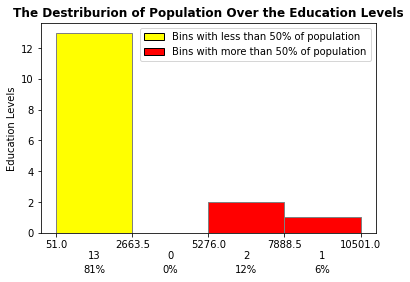

we see that the majurity of population are from three education levels which are as follow : 1- Some-college 2- HS-grad 3- Bachelors


In [143]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from matplotlib.pyplot import figure
data = pd.read_csv('adult_data.csv')
e=data.groupby(['education'])['age'].count().reset_index(name='Count')
figure(figsize=(400, 60), dpi=580)
data = e['Count']
colors = ['red', 'tan', 'lime','lime']
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data, facecolor='Yellow' ,edgecolor='gray',bins=4)


# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

# Change the colors of bars at the edges...
fifty = np.percentile(data, [50])
for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if rightside < fifty:
        patch.set_facecolor('yellow')
    elif leftside > fifty:
        patch.set_facecolor('red')
    #height = patch.get_height()
    #ax.annotate(str(int(count)), xy=(x, 0), xycoords=('data', 'axes fraction'),
    #xytext=(0, 20), textcoords='offset points', va='top', ha='center')

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(str(int(count)), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')

    


# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.15)
plt.ylabel('Education Levels')
plt.xlabel('')
plt.title("The Destriburion of Population Over the Education Levels",weight='bold',size=12);
labels=['Income less than or equal 50K', 'Income greater than or equal 50K']

labels=['Income less than or equal 50K', 'Income greater than or equal 50K']
#plt.legend( bbox_to_anchor=(1,1), loc="upper center", fontsize=10, bbox_transform=plt.gcf().transFigure,labels=labels)

#create legend
handles = [Rectangle((0,0),0.5,0.5,color=c,ec="k",) for c in ['yellow','red'] ]
labels= ["Bins with less than 50% of population","Bins with more than 50% of population"]


plt.legend(handles, labels)


plt.show()
print("we see that the majurity of population are from three education levels which are as follow : 1- Some-college 2- HS-grad 3- Bachelors")

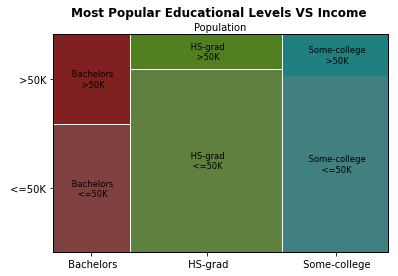

In [21]:
searchfor = ['Some-college', 'HS-grad','Bachelors']
data = pd.read_csv('adult_data.csv')
data_m=data.loc[data['education'].str.contains('|'.join(searchfor))]
data_m
from statsmodels.graphics. mosaicplot import mosaic
mosaic(data_m, ['education', 'income'])
plt.ylabel('Education Levels')
plt.xlabel('Population')
plt.title("Most Popular Educational Levels VS Income ",weight='bold',size=12);

plt.show()


Income,<=50K,>50K
Jobs,,
10th,93.354770,6.645230
11th,94.893617,5.106383
12th,92.378753,7.621247
1st-4th,96.428571,3.571429
5th-6th,95.195195,4.804805
7th-8th,93.808050,6.191950
9th,94.747082,5.252918
Assoc-acdm,75.164011,24.835989
Assoc-voc,73.878437,26.121563


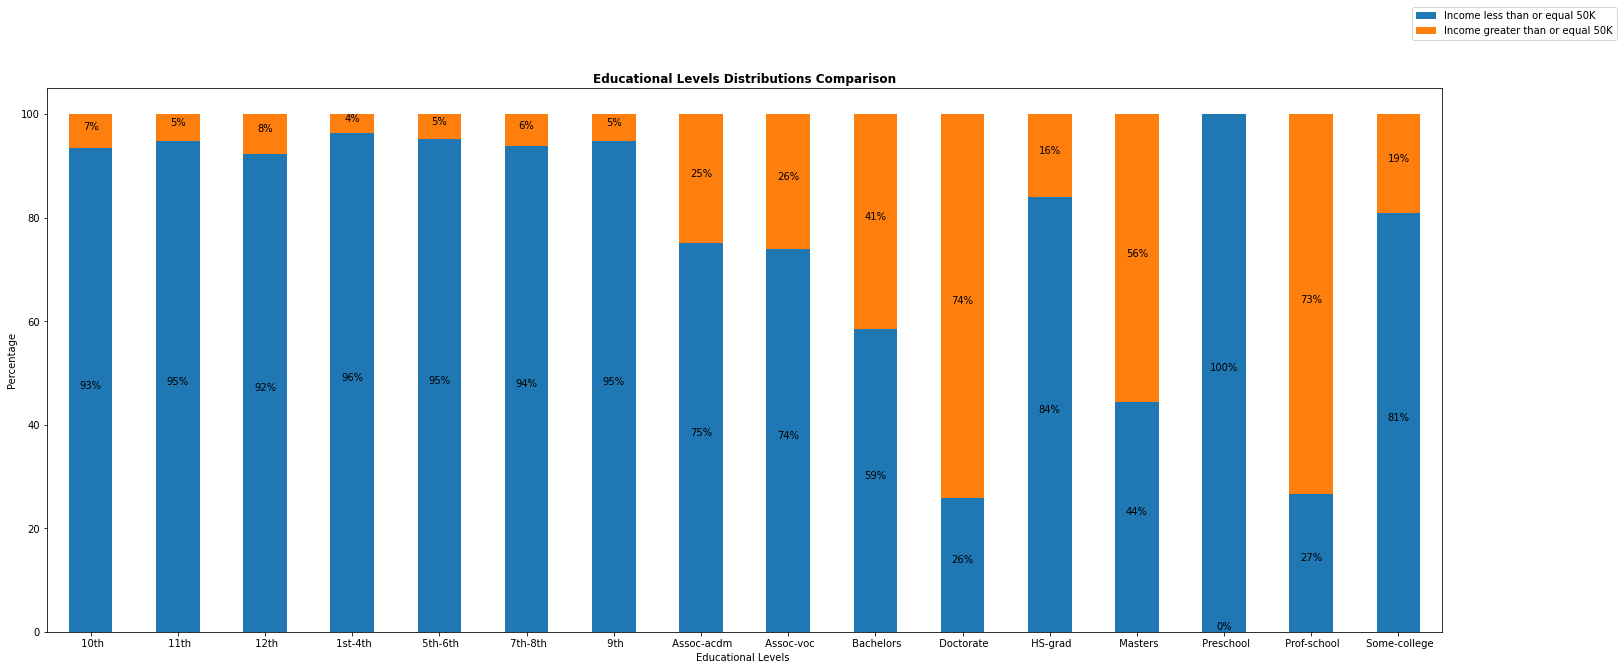

In [145]:
data = df.iloc[:, [3, 14]]
data.columns =['Jobs', 'Income']
Jobs = df.iloc[:,6]


data = data[data.Jobs != " ?"]
ax= pd.crosstab(data['Jobs'], data['Income']).apply(lambda r: r/r.sum()*100, axis=1)

ax_1 = ax.plot.bar(figsize=(25,10),stacked=True, rot=0 )
display(ax)
plt.title('Educational Levels Distributions Comparison', weight='bold', size=12)
plt.xlabel('Educational Levels ')
labels=['Income less than or equal 50K', 'Income greater than or equal 50K']
plt.ylabel('Percentage')
plt.legend( bbox_to_anchor=(1,1), loc="upper right", fontsize=10, bbox_transform=plt.gcf().transFigure,labels=labels)

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

<Figure size 290000x34800 with 0 Axes>

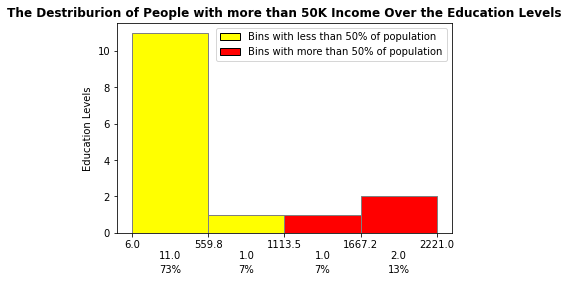

We see that most people with income more than 50K are from : 1- Bachelors , 2-HS-grad , 3- Some-college 


In [89]:
data = pd.read_csv('adult_data.csv')
data_icome_more=data[data['income'].str.contains('>')] 
data_icome_less=data[data['income'].str.contains('<')] 

G=data_icome_more.groupby(['education'])['age'].count().reset_index(name='Count')

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from matplotlib.pyplot import figure


fig=figure(figsize=(500, 60), dpi=580)

data =G['Count']
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data, facecolor='yellow',edgecolor='gray',bins=4)

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

# Change the colors of bars at the edges...
twentyfifth, seventyfifth = np.percentile(data, [25, 75])
fifty = np.percentile(data, [80])
for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if leftside < fifty:
        patch.set_facecolor('yellow')
    else :
        patch.set_facecolor('red')
        
# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.15)
plt.ylabel('Education Levels')
plt.xlabel('')
plt.title("The Destriburion of People with more than 50K Income Over the Education Levels",weight='bold',size=12);
handles = [Rectangle((0,0),0.5,0.5,color=c,ec="k",) for c in ['yellow','red'] ]
labels= ["Bins with less than 50% of population","Bins with more than 50% of population"]


plt.legend(handles, labels)

plt.show()

print("We see that most people with income more than 50K are from : 1- Bachelors , 2-HS-grad , 3- Some-college ")

<Figure size 232000x34800 with 0 Axes>

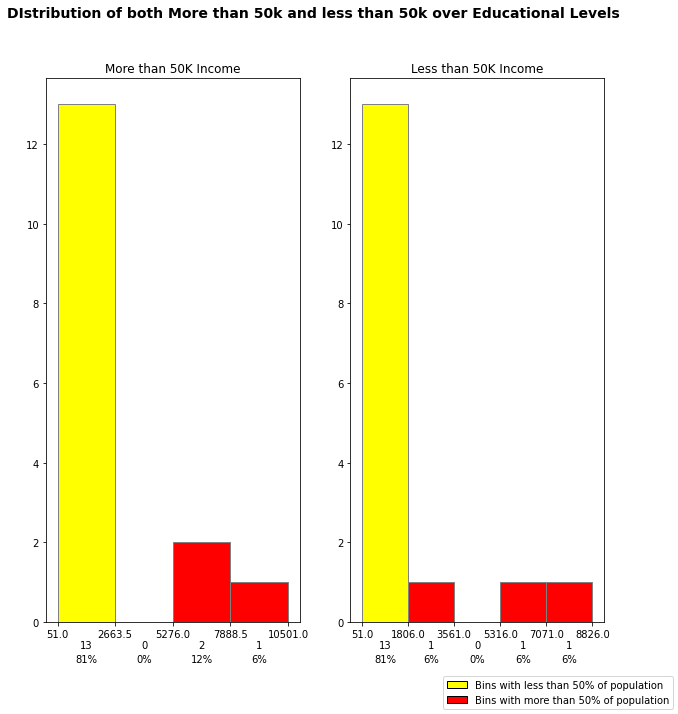

we see that the majurity of population are from three education levels which are as follow : 1- Some-college 2- HS-grad 3- Bachelors


In [132]:
ncols = 2
nrows = 1
#fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from matplotlib.pyplot import figure
data = pd.read_csv('adult_data.csv')
data_icome_more=data[data['income'].str.contains('>')] 
data_icome_less=data[data['income'].str.contains('<')] 

G=data_icome_more.groupby(['education'])['age'].count().reset_index(name='Count')
figure(figsize=(400, 60), dpi=580)
data = e['Count']
colors = ['red', 'tan', 'lime','lime']
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

counts, bins, patches = ax[0].hist(data, facecolor='Yellow' ,edgecolor='gray',bins=4)


# Set the ticks to be at the edges of the bins.
ax[0].set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

# Change the colors of bars at the edges...
fifty = np.percentile(data, [50])
for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if rightside < fifty:
        patch.set_facecolor('yellow')
    elif leftside > fifty:
        patch.set_facecolor('red')
    #height = patch.get_height()
    #ax.annotate(str(int(count)), xy=(x, 0), xycoords=('data', 'axes fraction'),
    #xytext=(0, 20), textcoords='offset points', va='top', ha='center')

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax[0].annotate(str(int(count)), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax[0].annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')

    

#Second graph 
data = pd.read_csv('adult_data.csv')
data_icome_more=data[data['income'].str.contains('>')] 
data_icome_less=data[data['income'].str.contains('<')] 

G=data_icome_less.groupby(['education'])['age'].count().reset_index(name='Count')


import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from matplotlib.pyplot import figure

#fig=figure(figsize=(500, 60), dpi=580)
data =G['Count']
#fig, ax = plt.subplots()
counts, bins, patches = ax[1].hist(data, facecolor='yellow',edgecolor='gray',bins=5)

# Set the ticks to be at the edges of the bins.
ax[1].set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

# Change the colors of bars at the edges...
twentyfifth, seventyfifth = np.percentile(data, [25, 75])
for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if rightside < twentyfifth:
        patch.set_facecolor('green')
    elif leftside > seventyfifth:
        patch.set_facecolor('red')

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax[1].annotate(str(int(count)), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax[1].annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
#plt.subplots_adjust(bottom=0.15)




# Give ourselves some more room at the bottom of the plot

labels=['Income less than or equal 50K', 'Income greater than or equal 50K']
#plt.legend( bbox_to_anchor=(1,1), loc="upper center", fontsize=10, bbox_transform=plt.gcf().transFigure,labels=labels)

#create legend
handles = [Rectangle((0,0),0.5,0.5,color=c,ec="k",) for c in ['yellow','red'] ]
labels= ["Bins with less than 50% of population","Bins with more than 50% of population"]


ax[1].title.set_text('Less than 50K Income')
ax[0].title.set_text('More than 50K Income')

fig = plt.gcf()
fig.suptitle("DIstribution of both More than 50k and less than 50k over Educational Levels ", weight='bold',fontsize=14)
fig.legend(handles, labels, loc='lower right') 
plt.show()
print("we see that the majurity of population are from three education levels which are as follow : 1- Some-college 2- HS-grad 3- Bachelors")

In [22]:
G.sort_values(by='Count', ascending=False)

,education,Count
9,Bachelors,2221
11,HS-grad,1675
14,Some-college,1387
12,Masters,959
13,Prof-school,423
8,Assoc-voc,361
10,Doctorate,306
7,Assoc-acdm,265
0,10th,62
1,11th,60


<Figure size 290000x34800 with 0 Axes>

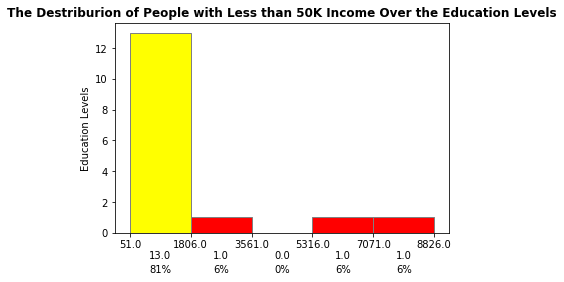

 We see that most of those with income less that than 50k are from  1- HS-grad , 2-Some-college , 3-Bachelors 


In [83]:
data = pd.read_csv('adult_data.csv')
data_icome_more=data[data['income'].str.contains('>')] 
data_icome_less=data[data['income'].str.contains('<')] 

G=data_icome_less.groupby(['education'])['age'].count().reset_index(name='Count')


import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from matplotlib.pyplot import figure

fig=figure(figsize=(500, 60), dpi=580)
data =G['Count']
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data, facecolor='yellow',edgecolor='gray',bins=5)

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

# Change the colors of bars at the edges...
twentyfifth, seventyfifth = np.percentile(data, [25, 75])
for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if rightside < twentyfifth:
        patch.set_facecolor('green')
    elif leftside > seventyfifth:
        patch.set_facecolor('red')

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.15)
plt.ylabel('Education Levels')
plt.xlabel('')
plt.title("The Destriburion of People with Less than 50K Income Over the Education Levels",weight='bold',size=12);
handles = [Rectangle((0,0),0.5,0.5,color=c,ec="k",) for c in ['yellow','red'] ]
labels= ["Bins with less than 50% of population","Bins with more than 50% of population"]
plt.show() 
data = pd.read_csv('adult_data.csv')
print(" We see that most of those with income less that than 50k are from  1- HS-grad , 2-Some-college , 3-Bachelors ")


<Figure size 290000x58000 with 0 Axes>

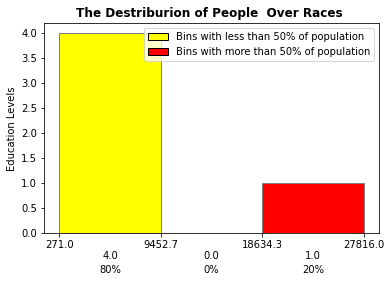

We see that most people with income more than 50K are from : 1- Bachelors , 2-HS-grad , 3- Some-college 


In [150]:
data = pd.read_csv('adult_data.csv')
data_icome_more=data[data['income'].str.contains('>')] 
data_icome_less=data[data['income'].str.contains('<')] 

G=data.groupby(['race'])['age'].count().reset_index(name='Count')

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from matplotlib.pyplot import figure


fig=figure(figsize=(500, 100), dpi=580)

data =G['Count']
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data, facecolor='yellow',edgecolor='gray',bins=3)

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

# Change the colors of bars at the edges...
twentyfifth, seventyfifth = np.percentile(data, [25, 75])
for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if rightside < twentyfifth:
        patch.set_facecolor('green')
    elif leftside > seventyfifth:
        patch.set_facecolor('red')

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.15)
plt.ylabel('Education Levels')
plt.xlabel('')
plt.title("The Destriburion of People  Over Races ",weight='bold',size=12);
handles = [Rectangle((0,0),0.5,0.5,color=c,ec="k",) for c in ['yellow','red'] ]
labels= ["Bins with less than 50% of population","Bins with more than 50% of population"]

plt.legend(handles, labels,loc='upper right')
plt.show()

print("We see that most people with income more than 50K are from : 1- Bachelors , 2-HS-grad , 3- Some-college ")

In [31]:
G.sort_values(by='Count', ascending=False)

,race,Count
4,White,27816
2,Black,3124
1,Asian-Pac-Islander,1039
0,Amer-Indian-Eskimo,311
3,Other,271


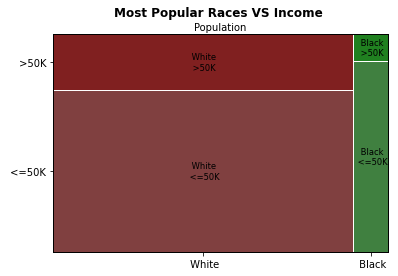

In [44]:
searchfor = ['White', 'Black']
data = pd.read_csv('adult_data.csv')
data_m=data.loc[data['race'].str.contains('|'.join(searchfor))]
data_m
from statsmodels.graphics. mosaicplot import mosaic
mosaic(data_m, ['race', 'income'])
plt.ylabel('Education Levels')
plt.xlabel('Population')
plt.title("Most Popular Races VS Income ",weight='bold',size=12);

plt.show()


<Figure size 290000x34800 with 0 Axes>

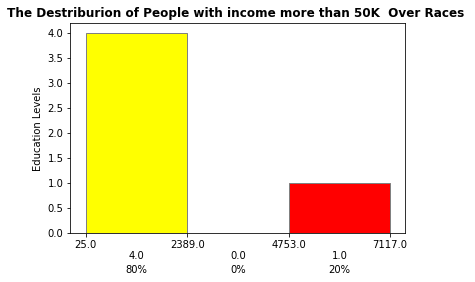

We see that most people with income more than 50K are from : 1- White people 


In [39]:
data = pd.read_csv('adult_data.csv')
data_icome_more=data[data['income'].str.contains('>')] 
data_icome_less=data[data['income'].str.contains('<')] 

G=data_icome_more.groupby(['race'])['age'].count().reset_index(name='Count')

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from matplotlib.pyplot import figure


fig=figure(figsize=(500, 60), dpi=580)

data =G['Count']
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data, facecolor='yellow',edgecolor='gray',bins=3)

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

# Change the colors of bars at the edges...
twentyfifth, seventyfifth = np.percentile(data, [25, 75])
for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if rightside < twentyfifth:
        patch.set_facecolor('green')
    elif leftside > seventyfifth:
        patch.set_facecolor('red')

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.15)
plt.ylabel('Education Levels')
plt.xlabel('')
plt.title("The Destriburion of People with income more than 50K  Over Races ",weight='bold',size=12);

plt.show()

print("We see that most people with income more than 50K are from : 1- White people ")

In [38]:
G.sort_values(by='Count', ascending=False)

,race,Count
4,White,7117
2,Black,387
1,Asian-Pac-Islander,276
0,Amer-Indian-Eskimo,36
3,Other,25


<Figure size 290000x34800 with 0 Axes>

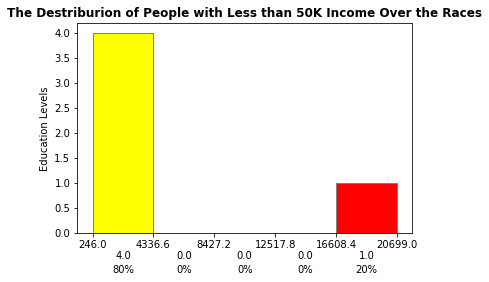

 We see that most of those with income less that than 50k are from  1- HS-grad , 2-Some-college , 3-Bachelors 


In [41]:
data = pd.read_csv('adult_data.csv')
data_icome_more=data[data['income'].str.contains('>')] 
data_icome_less=data[data['income'].str.contains('<')] 

G=data_icome_less.groupby(['race'])['age'].count().reset_index(name='Count')


import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from matplotlib.pyplot import figure

fig=figure(figsize=(500, 60), dpi=580)
data =G['Count']
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data, facecolor='yellow',edgecolor='gray',bins=5)

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

# Change the colors of bars at the edges...
twentyfifth, seventyfifth = np.percentile(data, [25, 75])
for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if rightside < twentyfifth:
        patch.set_facecolor('green')
    elif leftside > seventyfifth:
        patch.set_facecolor('red')

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.15)
plt.ylabel('Education Levels')
plt.xlabel('')
plt.title("The Destriburion of People with Less than 50K Income Over the Races",weight='bold',size=12);

plt.show() 
data = pd.read_csv('adult_data.csv')
print(" We see that most of those with income less that than 50k are from  1- HS-grad , 2-Some-college , 3-Bachelors ")


In [42]:
G.sort_values(by='Count', ascending=False)

,race,Count
4,White,20699
2,Black,2737
1,Asian-Pac-Islander,763
0,Amer-Indian-Eskimo,275
3,Other,246


ValueError: Length mismatch: Expected axis has 15 elements, new values have 2 elements

<Figure size 232000x34800 with 0 Axes>

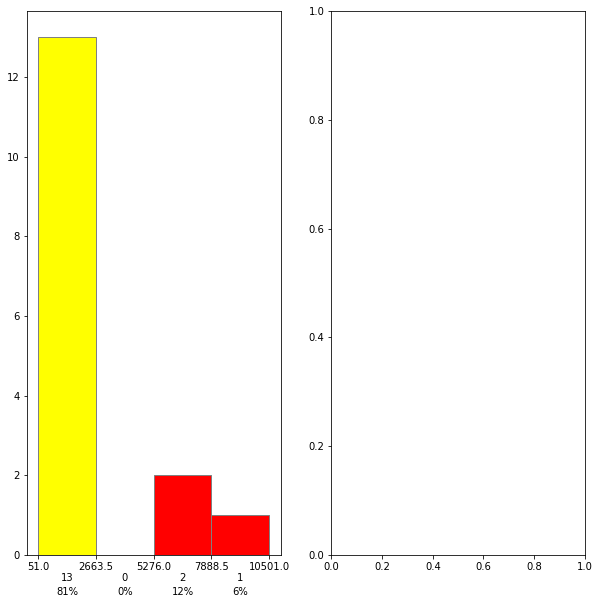

In [140]:
ncols = 2
nrows = 1
#fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from matplotlib.pyplot import figure
data = pd.read_csv('adult_data.csv')
data_icome_more=data[data['income'].str.contains('>')] 
data_icome_less=data[data['income'].str.contains('<')] 

G=data.groupby(['education'])['age'].count().reset_index(name='Count')
figure(figsize=(400, 60), dpi=580)
data = e['Count']
colors = ['red', 'tan', 'lime','lime']
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

counts, bins, patches = ax[0].hist(data, facecolor='Yellow' ,edgecolor='gray',bins=4)


# Set the ticks to be at the edges of the bins.
ax[0].set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

# Change the colors of bars at the edges...
fifty = np.percentile(data, [50])
for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if rightside < fifty:
        patch.set_facecolor('yellow')
    elif leftside > fifty:
        patch.set_facecolor('red')
    #height = patch.get_height()
    #ax.annotate(str(int(count)), xy=(x, 0), xycoords=('data', 'axes fraction'),
    #xytext=(0, 20), textcoords='offset points', va='top', ha='center')

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax[0].annotate(str(int(count)), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax[0].annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')

    

#Second graph 
data = pd.read_csv('adult_data.csv')
ata = df.iloc[:, [3, 14]]
data.columns =['Jobs', 'Income']
Jobs = df.iloc[:,6]


data = data[data.Jobs != " ?"]
ax= pd.crosstab(data['Jobs'], data['Income']).apply(lambda r: r/r.sum()*100, axis=1)

ax[1] = ax.plot.bar(figsize=(25,10),stacked=True, rot=0 )
display(ax)
plt.title('Jobs Income Comparison', weight='bold', size=12)
plt.xlabel('Jobs')
labels=['Income less than or equal 50K', 'Income greater than or equal 50K']
plt.ylabel('Percentage')
plt.legend( bbox_to_anchor=(1,1), loc="upper right", fontsize=10, bbox_transform=plt.gcf().transFigure,labels=labels)

for rec in ax[1].patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')




# Give ourselves some more room at the bottom of the plot
#plt.subplots_adjust(bottom=0.15)




# Give ourselves some more room at the bottom of the plot

labels=['Income less than or equal 50K', 'Income greater than or equal 50K']
#plt.legend( bbox_to_anchor=(1,1), loc="upper center", fontsize=10, bbox_transform=plt.gcf().transFigure,labels=labels)

#create legend
handles = [Rectangle((0,0),0.5,0.5,color=c,ec="k",) for c in ['yellow','red'] ]
labels= ["Bins with less than 50% of population","Bins with more than 50% of population"]


ax[1].title.set_text('Less than 50K Income')
ax[0].title.set_text('More than 50K Income')

fig = plt.gcf()
fig.suptitle("DIstribution of both More than 50k and less than 50k over Educational Levels ", weight='bold',fontsize=14)
fig.legend(handles, labels, loc='lower right') 
plt.show()
print("we see that the majurity of population are from three education levels which are as follow : 1- Some-college 2- HS-grad 3- Bachelors")

<Figure size 232000x34800 with 0 Axes>

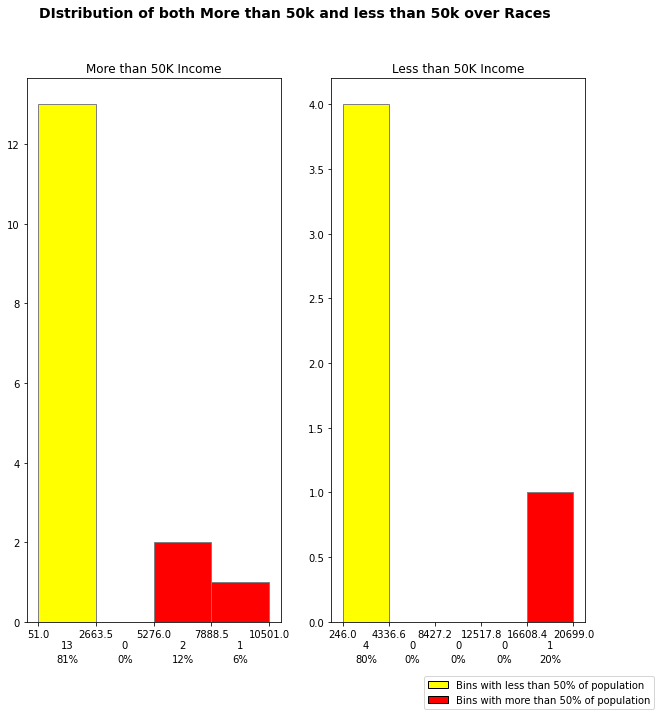

we see that the majurity of population are from three education levels which are as follow : 1- Some-college 2- HS-grad 3- Bachelors


In [155]:
ncols = 2
nrows = 1
#fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from matplotlib.pyplot import figure
data = pd.read_csv('adult_data.csv')
data_icome_more=data[data['income'].str.contains('>')] 
data_icome_less=data[data['income'].str.contains('<')] 

G=data_icome_more.groupby(['race'])['age'].count().reset_index(name='Count')
figure(figsize=(400, 60), dpi=580)
data = e['Count']
colors = ['red', 'tan', 'lime','lime']
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

counts, bins, patches = ax[0].hist(data, facecolor='Yellow' ,edgecolor='gray',bins=4)


# Set the ticks to be at the edges of the bins.
ax[0].set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

# Change the colors of bars at the edges...
fifty = np.percentile(data, [50])
for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if rightside < fifty:
        patch.set_facecolor('yellow')
    elif leftside > fifty:
        patch.set_facecolor('red')
    #height = patch.get_height()
    #ax.annotate(str(int(count)), xy=(x, 0), xycoords=('data', 'axes fraction'),
    #xytext=(0, 20), textcoords='offset points', va='top', ha='center')

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax[0].annotate(str(int(count)), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax[0].annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')

    

#Second graph 
data = pd.read_csv('adult_data.csv')
data_icome_more=data[data['income'].str.contains('>')] 
data_icome_less=data[data['income'].str.contains('<')] 

G=data_icome_less.groupby(['race'])['age'].count().reset_index(name='Count')


import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from matplotlib.pyplot import figure

#fig=figure(figsize=(500, 60), dpi=580)
data =G['Count']
#fig, ax = plt.subplots()
counts, bins, patches = ax[1].hist(data, facecolor='yellow',edgecolor='gray',bins=5)

# Set the ticks to be at the edges of the bins.
ax[1].set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

# Change the colors of bars at the edges...
twentyfifth, seventyfifth = np.percentile(data, [25, 75])
for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if rightside < twentyfifth:
        patch.set_facecolor('green')
    elif leftside > seventyfifth:
        patch.set_facecolor('red')

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax[1].annotate(str(int(count)), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax[1].annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
#plt.subplots_adjust(bottom=0.15)




# Give ourselves some more room at the bottom of the plot

labels=['Income less than or equal 50K', 'Income greater than or equal 50K']
#plt.legend( bbox_to_anchor=(1,1), loc="upper center", fontsize=10, bbox_transform=plt.gcf().transFigure,labels=labels)

#create legend
handles = [Rectangle((0,0),0.5,0.5,color=c,ec="k",) for c in ['yellow','red'] ]
labels= ["Bins with less than 50% of population","Bins with more than 50% of population"]


ax[1].title.set_text('Less than 50K Income')
ax[0].title.set_text('More than 50K Income')

fig = plt.gcf()
fig.suptitle("DIstribution of both More than 50k and less than 50k over Races ", weight='bold',fontsize=14)
fig.legend(handles, labels, loc='lower right') 
plt.show()
print("we see that the majurity of population are from three education levels which are as follow : 1- Some-college 2- HS-grad 3- Bachelors")

Income,<=50K,>50K
Jobs,,
Amer-Indian-Eskimo,88.424437,11.575563
Asian-Pac-Islander,73.435996,26.564004
Black,87.612036,12.387964
Other,90.774908,9.225092
White,74.414006,25.585994


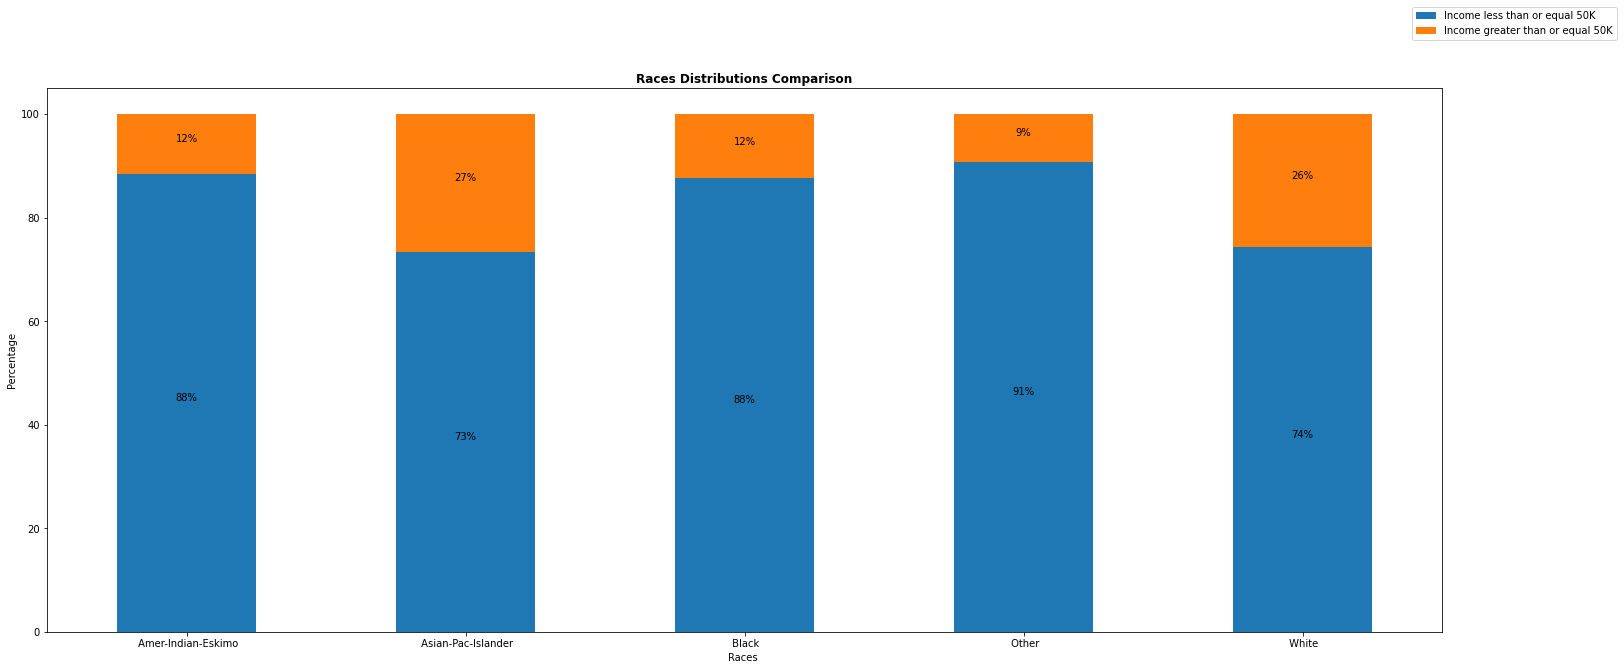

In [153]:
data = df.iloc[:, [8, 14]]
data.columns =['Jobs', 'Income']
Jobs = df.iloc[:,6]


data = data[data.Jobs != " ?"]
ax= pd.crosstab(data['Jobs'], data['Income']).apply(lambda r: r/r.sum()*100, axis=1)

ax_1 = ax.plot.bar(figsize=(25,10),stacked=True, rot=0 )
display(ax)
plt.title('Races Distributions Comparison', weight='bold', size=12)
plt.xlabel('Races ')
labels=['Income less than or equal 50K', 'Income greater than or equal 50K']
plt.ylabel('Percentage')
plt.legend( bbox_to_anchor=(1,1), loc="upper right", fontsize=10, bbox_transform=plt.gcf().transFigure,labels=labels)

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

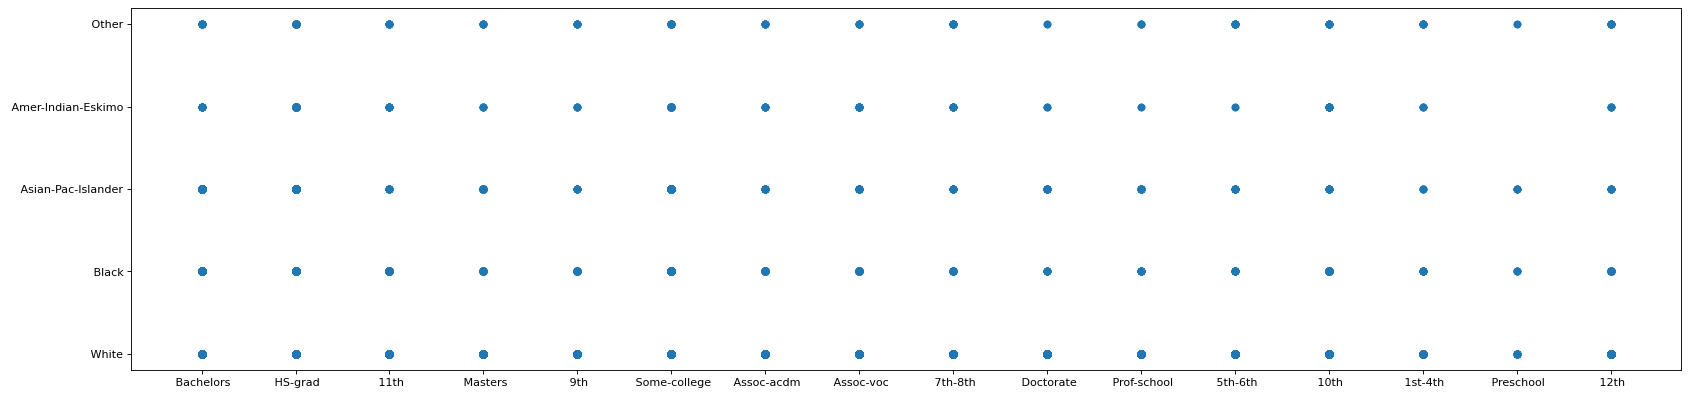

In [157]:
from matplotlib.pyplot import figure
data = pd.read_csv('adult_data.csv')
data_icome_more=data[data['income'].str.contains('>')] 
data_icome_less=data[data['income'].str.contains('<')]
manuStats=data
figure(figsize=(25, 6), dpi=80)
plt.scatter(manuStats['education'],
manuStats['race'])
plt.show()

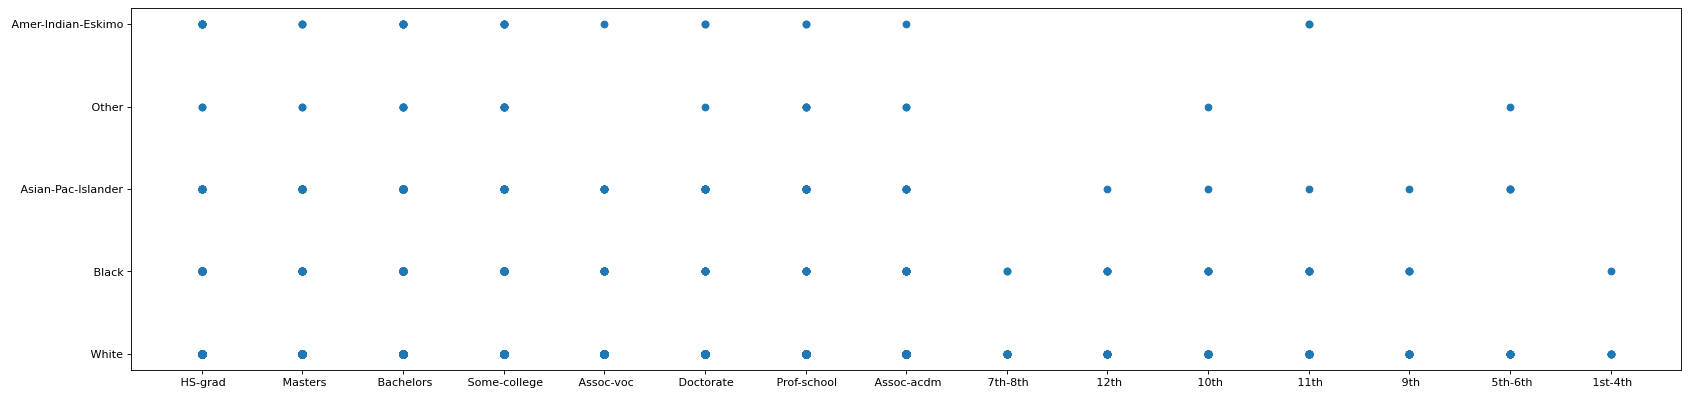

In [158]:
from matplotlib.pyplot import figure
data = pd.read_csv('adult_data.csv')
data_icome_more=data[data['income'].str.contains('>')] 
data_icome_less=data[data['income'].str.contains('<')]
manuStats=data_icome_more
figure(figsize=(25, 6), dpi=80)
plt.scatter(manuStats['education'],
manuStats['race'])
plt.show()

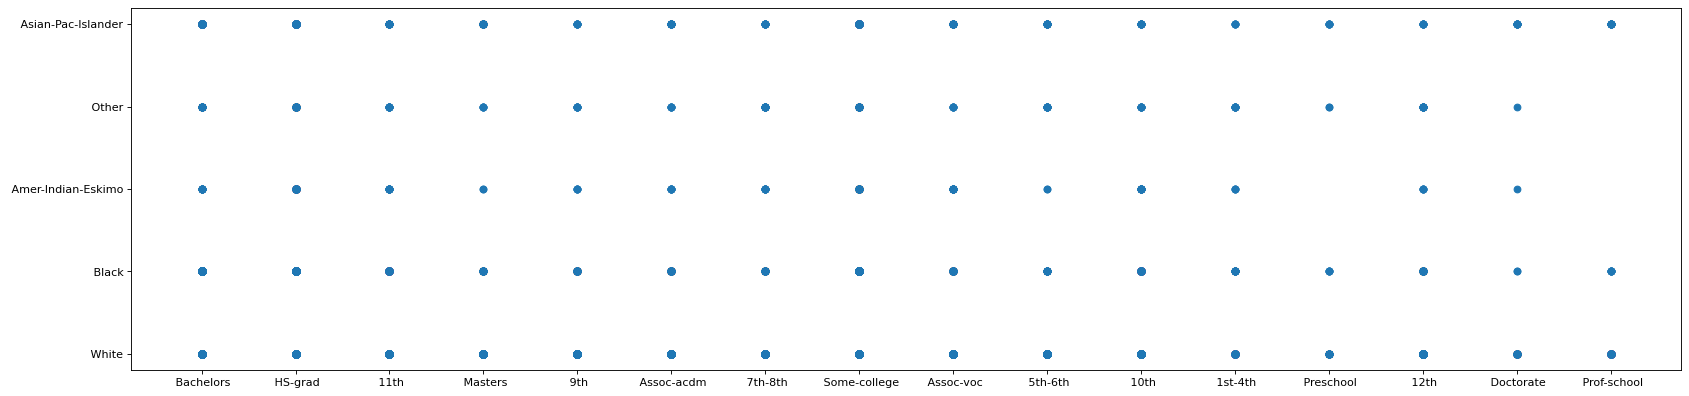

In [159]:
from matplotlib.pyplot import figure
data = pd.read_csv('adult_data.csv')
data_icome_more=data[data['income'].str.contains('>')] 
data_icome_less=data[data['income'].str.contains('<')]
manuStats=data_icome_less
figure(figsize=(25, 6), dpi=80)
plt.scatter(manuStats['education'],
manuStats['race'])
plt.show()